In [1]:
import re
import pickle
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Initialize Variables

# Initialize Stemming class to use 'stem' function
ps = PorterStemmer()

# Select the top n words occured in the dataset
n_top_words = 550

# Import english stopwords
stopwords.words("english")

#nltk.download('stopwords') # Run this if 'english stopwords not found'

# Read dataset
dataset = pd.read_csv("dataset.csv")

In [3]:
dataset.head()

,Sentence,Type
0,"Ali, who was two at the time, loved the story ...",Auditory
1,"Look at my dad, spiffed up in jodhpurs, ready ...",Auditory
2,Believe me it's far more difficult to know wha...,Auditory
3,"The Surrealists loved bad movies, seeing them ...",Auditory
4,"He idolised prize-fighters, regarded racketeer...",Auditory


<AxesSubplot:>

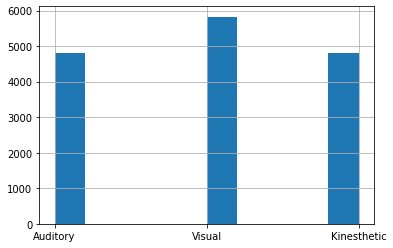

In [4]:
# Visualize data distribution
dataset['Type'].hist()

In [5]:
# Function to preprocess text
def clean(text):
    text = re.sub("[^a-zA-z]", " ", text).lower()
    text = text.split()
    text = [ ps.stem(word) for word in text if word not in set(stopwords.words("english"))]
    text = " ".join(text)
    return text

# Function to encode the text using an object of CountVectorizer
def encode(text, cv):
    encoded_text = cv.transform(list([text])).toarray()
    return encoded_text

# Function to decode the classification result
def decode(result, label_encoder):
    decoded_result = label_encoder.inverse_transform(result)[0]
    return decoded_result

In [7]:
# Clean sentences
sentences = dataset["Sentence"].apply(clean)

In [8]:
# Preprocessing

# Initialize CountVectorizer so it uses a specific number for top occuring words
count_vector = CountVectorizer(max_features = n_top_words)

# Transform all the sentences to a rows and vector form
X = count_vector.fit_transform(sentences).toarray()

# Set y (the output) to the second column of the dataset
y = dataset.iloc[:, 1]

# Initialize label encoder and encode the learning style labels
label_enc = LabelEncoder()
y = label_enc.fit_transform(y)

# Split the dataset into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Bulding the model and applying it to the encoded data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [10]:
# Evaluating the model accuracy
score = classifier.score(X_test, y_test) * 100
print("Model score = " + str(score))

Model score = 94.30420711974111


In [11]:
# Testing the model on 3 samples

# Initialize data
sentence1 = "I like to try out things to understand how it works, 'experiencing' is my power to learn"
sentence2 = "All what we do is visualizing how things work and imagine new possibilities"
sentence3 = "I hear the wind call my name, the sound that leads me home again"

# Preprocess & Encode data
sample1 = encode(clean(sentence1), count_vector)
sample2 = encode(clean(sentence2), count_vector)
sample3 = encode(clean(sentence3), count_vector)

# Classify & Decode results
print( decode(classifier.predict(sample1), label_enc) ) # Kinesthetic
print( decode(classifier.predict(sample2), label_enc) ) # Visual
print( decode(classifier.predict(sample3), label_enc) ) # Auditory

Kinesthetic
Visual
Auditory


In [12]:
# Save model
with open("classifier.pkl", 'wb') as file:
        pickle.dump(classifier, file)